<a href="https://colab.research.google.com/github/Naama133/WIKI_IR_ENGINE/blob/master/MAP_K_calculation_%26_Plot_of_engine_performance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def precision_at_k(true_list,predicted_list,k=40):    
    """
    Calculate precision@k metric.

    Parameters
    -----------
    true_list: list of relevant documents. Each element is a doc_id.
    predicted_list: sorted list of documents predicted as relevant. Each element is a doc_id. Sorted is performed by relevance score
    k: integer, a number to slice the length of the predicted_list
    
    Returns: precision@k with 3 digits after the decimal point.
    """      
    predicted_list_k = predicted_list[:k]
    dic = {}
    for doc in true_list:
      dic[doc] = 0
    counter = 0
    for doc in predicted_list_k:
      if doc in dic:
        counter+=1
    return round(float(counter/k),3)

def MAP_at_K(true_list,predicted_list,k=40):
    """
    Calculate the average_precision@k metric (precision in every recall point).     

    Parameters
    -----------
    true_list: list of lists: list of true resulets for queries from train test. Each element is a doc_id.
    predicted_list: list of lists: list of results for queries from our IR engine , sorted list of documents predicted as relevant. Each element is a doc_id. Sorted is performed by relevance score
    
    ** Those lists must have the same order **

    Returns: float, average precision@k with 3 digits after the decimal point.
    """
    if not true_list:
      return round(float(0),3)
    avg_precision = []
    for i in range(len(true_list)):
      predicted_list_k = predicted_list[i][:k]
      true_list_for_q = true_list[i]
      dic = {}
      for doc in true_list_for_q:
        dic[doc] = 0
      sum_result = 0
      counter = 0
      index = 0
      for doc in predicted_list_k:
        index+=1
        if doc in dic:
          counter+=1
          sum_result += precision_at_k(true_list_for_q,predicted_list[i],index)
      if(sum_result==0):
        avg_precision.append(round(float(0),3))
      else:
        avg_precision.append(round(float(sum_result/counter),3))   
    return round(float(sum(avg_precision)/len(avg_precision)),3)
    
# run example
#queries_true_list = [q1=[1,2,3], q2=[1,2,3]]
#queries_predicted_list_resluts = [q1=[1,2,3], q2=[1,2,3]]
# queries_true_list: list of lists: list of true resulets for queries from train test json file
# queries_predicted_list_resluts: list of lists: list of results for queries from our IR engine 
#map_40 = MAP_at_K(queries_true_list,queries_predicted_list_resluts,k=40)

In [ ]:
import matplotlib.pyplot as plt

def plot_MAP_at_K_with_differnt_k_values(true_relevancy,predicted_relevancy,k_values):    
    """
    Plot a for MAP@K metric the values depands on k_values as line chart.

    Parameters
    ----------
    true_relevancy: list of lists: list of true resulets for queries from train test json file
    predicted_relevancy: list of lists: list of results for queries from our IR engine 
    k_values: list of integer of different k values.
    """

    values = []
    for k in k_values:
      values.append(MAP_at_K(true_relevancy,predicted_relevancy,k))
    plt.plot(k_values, values)
    plt.xlabel('K - values')
    plt.ylabel('Results')
    plt.show()
    return values

In [ ]:
def plot__IR_time_per_version(times_measurements):    
    plt.plot([i for i in range(1,len(times_measurements)+1)], times_measurements)
    plt.xticks([i for i in range(1,len(times_measurements)+1)])
    plt.yticks(times_measurements)
    plt.xlabel('Engine versions')
    plt.ylabel('Times measurements')
    plt.show()


------ MAP@K results for different K values ------



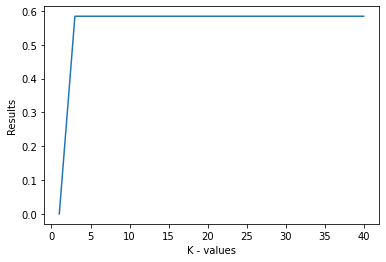


      MAP@40 result for this version: 0.584

----------------- Average IR time -----------------



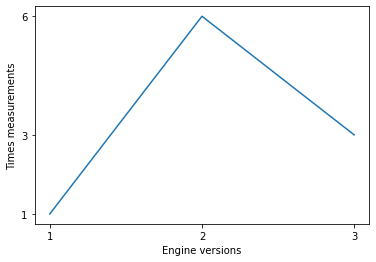

In [ ]:
k_values = [1,3,5,10,20,30,40]
print("")
print("------ MAP@K results for different K values ------")
print("")
results = plot_MAP_at_K_with_differnt_k_values([[1,2,3]],[[4,2,3]],k_values=k_values)
print("")
print("      MAP@40 result for this version: " + str(results[-1]))
print("")
print("----------------- Average IR time -----------------")
print("")
plot__IR_time_per_version([1,6,3])
print("")